# What all things we require for machine learning with numpy?

* indexing
    * simple
    * fancy
* reshaping
* visualizing dimensions
* swapaxes
* transpose
* generating ones and zeros
* generating random
    * integers
    * uniform
    * normal
* reversing - confusion
* example to batch for prediction
    ```python
    b = np.expand_dims(a,axis=0)
    c = np.expand_dims(a,axis=1)
    ```
* concatenation
* np.where
* shuffling


## Creating arrays with numpy

In [138]:
import numpy as np
import matplotlib.pyplot as plt

In [140]:
a = np.ones((3, 3))
b = np.zeros((3, 3))
print(a)
print('\n')
print(b)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [146]:
np.arange(1, 10).reshape((3, 3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [148]:
np.linspace(1, 100, 100)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [139]:
a = np.ones((3, 3))
print(np.triu(a))
print('\n')
print(np.tril(a))

[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]


[[1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 1.]]


In [149]:
min = 1
max = 10
shape = (4, 5)
x = np.random.randint(min, max, shape)
x, x.shape

(array([[1, 1, 9, 9, 2],
        [8, 3, 3, 6, 1],
        [3, 6, 2, 2, 3],
        [3, 3, 8, 5, 5]]),
 (4, 5))

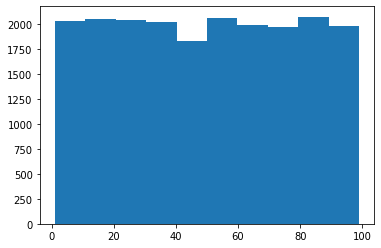

In [151]:
plt.hist(np.random.randint(1, 100, (20000, )))
plt.show()

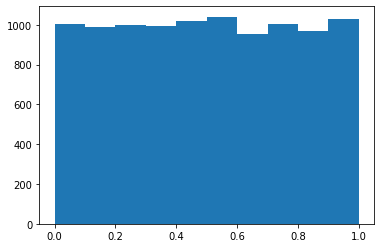

In [152]:
plt.hist(np.random.rand(10000))
plt.show()

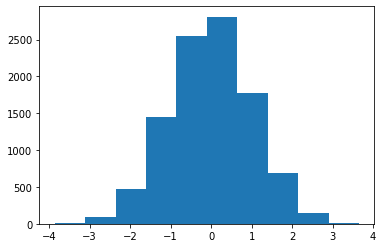

In [153]:
plt.hist(np.random.randn(10000))
plt.show()

## indexing & reversing

In [155]:
x, x.shape

(array([[1, 1, 9, 9, 2],
        [8, 3, 3, 6, 1],
        [3, 6, 2, 2, 3],
        [3, 3, 8, 5, 5]]),
 (4, 5))

In [156]:
x[1, 2]

3

In [159]:
x[1:, ::2] # second row - end, 
        # column - all but in step 2

array([[8, 3, 1],
       [3, 2, 3],
       [3, 8, 5]])

In [160]:
x1d = np.random.randint(1, 10, 10)

In [161]:
x1d

array([3, 2, 6, 5, 4, 6, 5, 4, 6, 3])

In [162]:
x1d[::-1]

array([3, 6, 4, 5, 6, 4, 5, 6, 2, 3])

In [163]:
x1d[-2::-1]

array([6, 4, 5, 6, 4, 5, 6, 2, 3])

## reshaping

In [176]:
x

array([[1, 1, 9, 9, 2],
       [8, 3, 3, 6, 1],
       [3, 6, 2, 2, 3],
       [3, 3, 8, 5, 5]])

In [177]:
x.shape

(4, 5)

In [182]:
x.reshape(2, 10)

array([[1, 1, 9, 9, 2, 8, 3, 3, 6, 1],
       [3, 6, 2, 2, 3, 3, 3, 8, 5, 5]])

In [178]:
x.ravel()

array([1, 1, 9, 9, 2, 8, 3, 3, 6, 1, 3, 6, 2, 2, 3, 3, 3, 8, 5, 5])

## expanding dimensions for batch

In [185]:
x

array([[1, 1, 9, 9, 2],
       [8, 3, 3, 6, 1],
       [3, 6, 2, 2, 3],
       [3, 3, 8, 5, 5]])

In [184]:
np.expand_dims(x[0], axis=0)

array([[1, 1, 9, 9, 2]])

## Grid plot

In [165]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
def grid_plot(from_paths, size=(16,8), bs=16, ixs=[]):
    if not ixs: ixs = list(np.random.randint(0, len(from_paths) - 1, bs))
    batch_paths = [from_paths[i] for i in ixs]
    input = np.array([mpimg.imread(p) for p in batch_paths])
    no_images, height, width, channels = input.shape # this is nrows*ncols, height, width, channels

    ncols = int(np.sqrt(bs))
    nrows = no_images//ncols
    assert ncols*nrows == bs, "Batch size must be a perfect square"

    # we want nrows*height, ncols*width, channels
    # so,
    result = (input.reshape(nrows, ncols, height, width, channels) # changes to nrows, ncols, height, width, channels
            .swapaxes(1, 2) # (nrows(axis=0), ncols(axis=1), height(axis=2), width(axis=3), channels) becomes (nrows, height, ncols, width, channels)
            .reshape(height*nrows, width*ncols, channels)) # changes to the desired output
    plt.rcParams["figure.figsize"] = size
    plt.imshow(result)

In [168]:
from easy_vqa import get_test_image_paths

In [173]:
train_image_paths = get_test_image_paths()

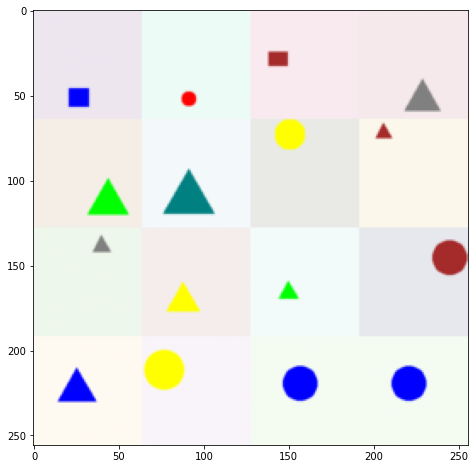

In [187]:
grid_plot(train_image_paths)

# What all things we require for matplotlib ?

* definitely subplots
* figure and axis
* rcParams
* spaces between images
* bar, line, scatter
* scale
* mpimg, imshow

## subplots

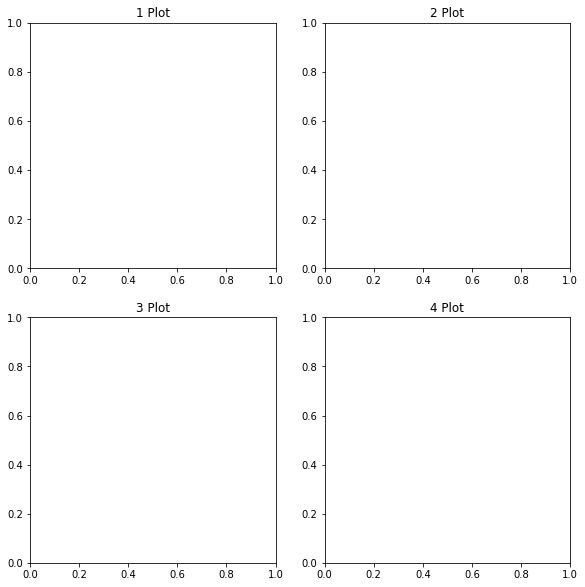

In [188]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,4))
plt.subplots_adjust(top=2, right=2)

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.set_title(f'{i+1} Plot')


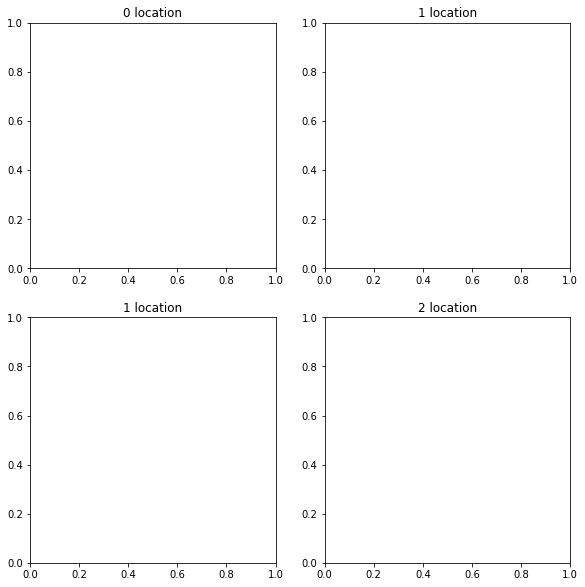

In [69]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(4,4))
plt.subplots_adjust(top=2, right=2)
for i in range(rows):
    for j in range(cols):
        axes[i][j].set_title(f"{i+j} location")

## adjust spacing between plots

In [46]:
#       left  = 0.125  # the left side of the subplots of the figure
#       right = 0.9    # the right side of the subplots of the figure
#       bottom = 0.1   # the bottom of the subplots of the figure
#       top = 0.9      # the top of the subplots of the figure
#       wspace = 0.2   # the amount of width reserved for blank space between subplots
#       hspace = 0.2   # the amount of height reserved for white space between subplots

## bar, line, hist, scatter

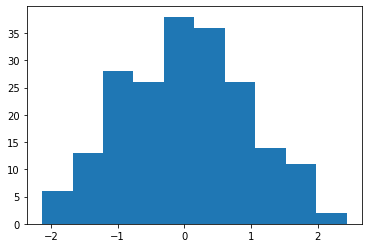

In [54]:
x = np.random.randn(200)
plt.hist(x)
plt.show()

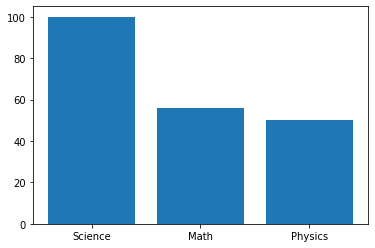

In [55]:
departments = ["Science", "Math", "Physics"]
faculties_per_department = [100, 56, 50]

plt.bar(departments, faculties_per_department)
plt.show()

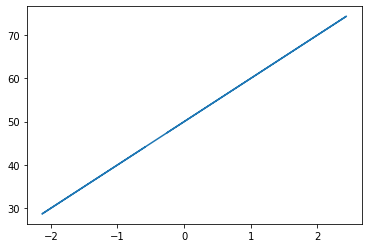

In [58]:
y = 10*x + 50
plt.plot(x, y)
plt.show()

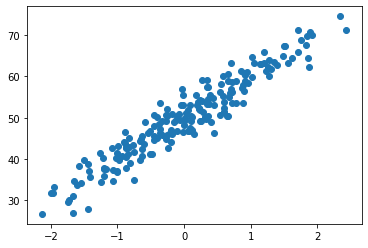

In [61]:
plt.scatter(x, y+3*np.random.randn(len(x)))
plt.show()

## scaling plots

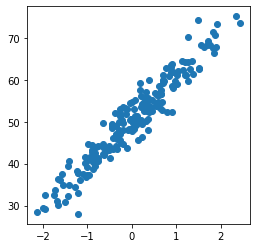

In [72]:
plt.figure(figsize=(4, 4))
plt.scatter(x, y+3*np.random.randn(len(x)))
plt.show()

## images

In [74]:
import matplotlib.image as mpimg

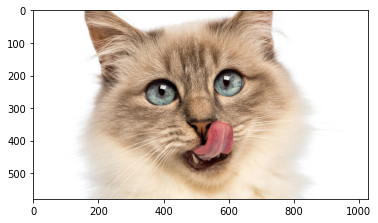

In [88]:
img = mpimg.imread("cat1.jpg")
plt.imshow(img)
plt.show()

# What all things we require for Pandas?|


* reading data
* selecting columns
* understanding data
* feather format
* grouping
* apply

## reading data

In [94]:
import pandas as pd

In [95]:
pd.read_csv
pd.read_json
pd.read_excel
pd.read_feather

<function pandas.io.feather_format.read_feather(path, columns=None, use_threads: bool = True)>

In [100]:
! wget --header="Host: people.sc.fsu.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://people.sc.fsu.edu/~jburkardt/data/csv/csv.html" "https://people.sc.fsu.edu/~jburkardt/data/csv/cities.csv" -c -o 'cities.csv'

In [101]:
! dir

 Volume in drive D is Data
 Volume Serial Number is 6E27-1BF2

 Directory of D:\work\book_drafts\src\notebooks

07-02-2021  09:19    <DIR>          .
07-02-2021  09:19    <DIR>          ..
07-02-2021  09:19               495 'cities.csv'
06-02-2021  11:31    <DIR>          .ipynb_checkpoints
07-02-2021  09:09               184 .wget-hsts
19-05-2020  00:52            87,493 1030_LL_domestic_cats-1028x579.jpg
19-05-2020  00:52            87,493 1030_LL_domestic_cats-1028x579.jpg.1
07-02-2021  09:17           225,448 Appendix_Numpy,_Matplotlib,_Pandas.ipynb
02-01-2021  13:33           938,032 Bengaluru_House_Data.csv
19-05-2020  00:52            87,493 cat1.jpg
15-09-2020  07:00             2,199 CHAPTER_01_coding.ipynb
04-07-2016  20:16             8,402 cities.csv
01-01-2021  15:56    <DIR>          dask-worker-space
02-01-2021  11:54            74,110 Dask.ipynb
02-01-2021  09:48            11,554 dask_scikit_learn.ipynb
01-01-2021  15:44            12,025 dask_scikit_learn.txt
02-01-2

In [193]:
df = pd.read_csv('cities.csv')

In [194]:
df.head()

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI


In [195]:
df.columns

Index(['LatD', ' "LatM"', ' "LatS"', ' "NS"', ' "LonD"', ' "LonM"', ' "LonS"',
       ' "EW"', ' "City"', ' "State"'],
      dtype='object')

In [191]:
people_dict = {
    "weight": pd.Series([68, 83, 112]),
    "birthyear": pd.Series([1984, 1985, 1992]),
    "children": pd.Series([0, 3]),
    "hobby": pd.Series(["Biking", "Dancing"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
0,68,1984,0.0,Biking
1,83,1985,3.0,Dancing
2,112,1992,NaN,NaN


In [196]:
df[['LatD', ' "LatM"', ' "LatS"']]

,LatD,"""LatM""","""LatS"""
0,41,5,59
1,42,52,48
2,46,35,59
3,42,16,12
4,43,37,48
...,...,...,...
123,39,31,12
124,50,25,11
125,40,10,48
126,40,19,48


In [ ]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")

In [114]:
df.columns

Index(['LatD', ' "LatM"', ' "LatS"', ' "NS"', ' "LonD"', ' "LonM"', ' "LonS"',
       ' "EW"', ' "City"', ' "State"'],
      dtype='object')

In [211]:
df[df.columns[df.columns.str.endswith('S"')]]

,"""LatS""","""NS""","""LonS"""
0,59,"""N""",0
1,48,"""N""",23
2,59,"""N""",36
3,12,"""N""",0
4,48,"""N""",11
...,...,...,...
123,12,"""N""",35
124,11,"""N""",0
125,48,"""N""",23
126,48,"""N""",48


In [120]:
df[df['LatD'] > 30]

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI
...,...,...,...,...,...,...,...,...,...,...
123,39,31,12,"""N""",119,48,35,"""W""","""Reno""",NV
124,50,25,11,"""N""",104,39,0,"""W""","""Regina""",SA
125,40,10,48,"""N""",122,14,23,"""W""","""Red Bluff""",CA
126,40,19,48,"""N""",75,55,48,"""W""","""Reading""",PA


## grouping

In [215]:
df = pd.DataFrame(
{
"A": ["foo", "bar", "foo"] * 3,
"B": ["one", "two", "three"] * 3,
"C": np.random.randint(1, 10, 9),
"D": np.random.randn(9),
}
)

In [216]:
df

,A,B,C,D
0,foo,one,3,-1.106099
1,bar,two,3,-0.422767
2,foo,three,8,0.501950
3,foo,one,3,0.182536
4,bar,two,5,1.425736
5,foo,three,3,-0.083022
6,foo,one,1,2.034251
7,bar,two,9,1.230655
8,foo,three,8,0.304152


In [217]:
df.groupby('A').sum()

,C,D
A,,
bar,17,2.233624
foo,26,1.833769


## apply

In [218]:
def get_even(val): 
    if val%2==0: return val
    else: return -1

In [219]:
df['C'].apply(get_even)

0   -1
1   -1
2    8
3   -1
4   -1
5   -1
6   -1
7   -1
8    8
Name: C, dtype: int64

In [131]:
import numpy as np

In [220]:
np.where(df['C']%2 ==0, df['C'], -1)

array([-1, -1,  8, -1, -1, -1, -1, -1,  8])